In [1]:
%matplotlib inline
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import icshop_simulation as sim

In [3]:
# demo of ice-cream shop simulation time log
random.seed(1)
sim.simulation(2,2,1,0,5000,"",True)

12:00:00PM: Nitro Ice-cream Shop opens.
+++ 12:14:50PM: New customer! Customer 1 arrives.
=== 12:17:23PM: Customer 1 completes ordering.
*** 12:21:36PM: Ice-cream ready! Customer 1's icecream order is completed!
+++ 12:41:29PM: New customer! Customer 2 arrives.
=== 12:45:16PM: Customer 2 completes ordering.
*** 12:49:29PM: Ice-cream ready! Customer 2's icecream order is completed!
+++ 13:26:02PM: New customer! Customer 3 arrives.
=== 13:30:06PM: Customer 3 completes ordering.
*** 13:34:21PM: Ice-cream ready! Customer 3's icecream order is completed!
+++ 13:34:56PM: New customer! Customer 4 arrives.
+++ 13:35:13PM: New customer! Customer 5 arrives.
+++ 13:37:45PM: New customer! Customer 6 arrives.
+++ 13:38:09PM: New customer! Customer 7 arrives.
=== 13:38:13PM: Customer 4 completes ordering.
*** 13:40:20PM: Ice-cream ready! Customer 4's icecream order is completed!
+++ 13:41:16PM: New customer! Customer 8 arrives.
=== 13:41:34PM: Customer 5 completes ordering.
=== 13:45:30PM: Customer 

=== 18:59:25PM: Customer 56 completes ordering.
+++ 19:01:13PM: New customer! Customer 57 arrives.
*** 19:03:12PM: Ice-cream ready! Customer 56's icecream order is completed!
=== 19:04:18PM: Customer 57 completes ordering.
+++ 19:05:53PM: New customer! Customer 58 arrives.
+++ 19:06:38PM: New customer! Customer 59 arrives.
*** 19:07:29PM: Ice-cream ready! Customer 57's icecream order is completed!
=== 19:09:55PM: Customer 58 completes ordering.
+++ 19:10:36PM: New customer! Customer 60 arrives.
=== 19:12:30PM: Customer 59 completes ordering.
+++ 19:14:31PM: New customer! Customer 61 arrives.
=== 19:15:57PM: Customer 60 completes ordering.
*** 19:16:19PM: Ice-cream ready! Customer 58's icecream order is completed!
*** 19:16:34PM: Ice-cream ready! Customer 59's icecream order is completed!
=== 19:18:47PM: Customer 61 completes ordering.
*** 19:20:12PM: Ice-cream ready! Customer 61's icecream order is completed!
*** 19:20:35PM: Ice-cream ready! Customer 60's icecream order is completed!
+

In [4]:
sim.simulation(60,3,2,1,5000,"",True) 

Budget is not enough. Please adjust employee numbers.


In [5]:
sim.simulation(0,0,2,1,5000,"",True) 

Wrong simulation. Shop cannot operate without a chef!


In [6]:
# 1 medium ice_cream ~ 1.5 small ice_cream; 1 large ice_cream ~ 2 small ice_cream in terms of quantity/raw material
names = ["experienced chef", "new chef", "experienced cashier", "new cashier", "small icecream", \
         "medium icecream", "large icecream", "total icecream", "number of customer", "order waiting time", "prepare waiting time", "waiting time", "profit"]

In [7]:
df=pd.read_csv("sample.csv",names=names)

In [8]:
df.head()

,experienced chef,new chef,experienced cashier,new cashier,small icecream,medium icecream,large icecream,total icecream,number of customer,order waiting time,prepare waiting time,waiting time,profit
0,1,0,1,0,68,76,128,438.0,59,3,72,75,1462.0
1,1,0,1,0,98,93,144,525.5,68,6,115,121,1812.0
2,1,0,1,0,79,92,151,519.0,60,3,99,102,1786.0
3,1,0,1,0,64,70,114,397.0,53,3,58,61,1298.0
4,1,0,1,0,76,65,114,401.5,53,2,52,54,1316.0


In [9]:
def waitingtime_vs_employee(column1_name:str,column2_name:str,column3_name:str):
    plt.figure(figsize=(15,10))
    ax = plt.subplot(111)

    for i in range(min(df[column1_name]),max(df[column1_name])+1):
        for j in range(min(df[column2_name]),max(df[column2_name])+1):
            label=str(i)+" exp & "+str(j)+" non-exp"
            tmp_df=df.loc[(df[column1_name]==i) & (df[column2_name]==j)][column3_name]
            ax.plot(np.arange(1,len(tmp_df)+1),tmp_df,label=label)

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()


### Examine the tradeoff between total waiting time and number of chefs.
From the plot, it is observed that the number of chefs and their experience factor significantly impact the total waiting time. As expected, more chefs will help decrease the waiting time. With the same number of chefs, more experienced chefs will make the total waiting time reduce. However, the shop owner should consider between paying more for more chefs and the satisfaction of customers of having short waiting time to get their ordered icecreams.

For example, with 2 experienced and 1 new chefs, customers only have to wait for an average time of <10mins to get their order. However, with 2 exp chefs, they have to wait for approximately 18mins which is still reasonable.

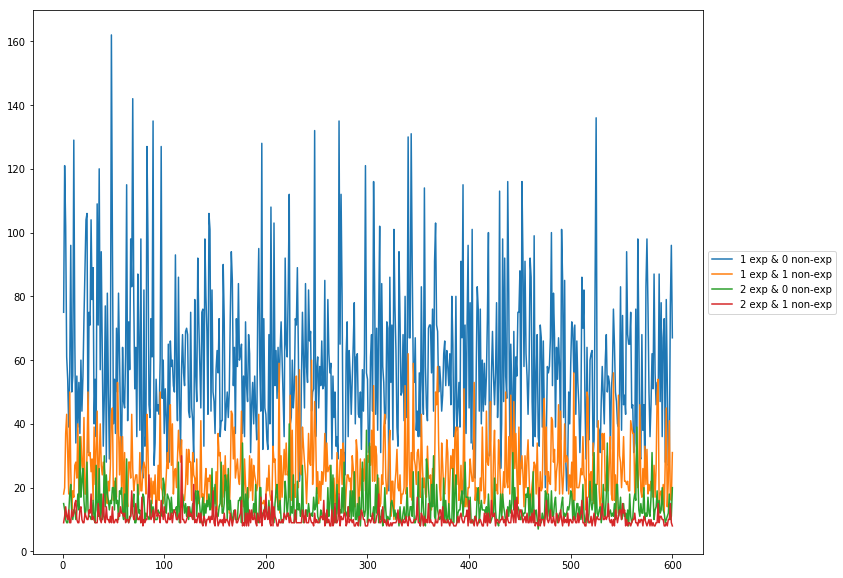

In [10]:
waitingtime_vs_employee('experienced chef','new chef','waiting time')

### Examine the tradeoff between total waiting time and number of cashiers.
From the plot, it is observed that the number of cashiers and the combination of experienced and new cashiers do not impact the total waiting time.


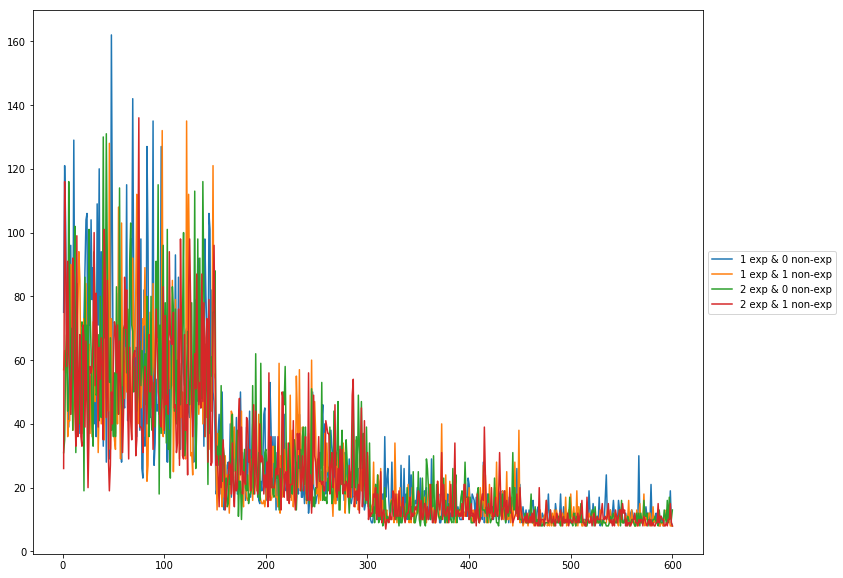

In [11]:
waitingtime_vs_employee('experienced cashier','new cashier','waiting time') 

### Examine the tradeoff between order waiting time and number of cashiers.
Although with more than 1 cashier (1 exp + 1 new, 2 exp or 2 exp + 1 new) results significantly low waiting time for ordering (less than 5 mins for each customer), the ordering waiting time with only 1 cashier is still acceptable with a moderate possibility of less than 10 minutes and high possiblity of less than 15 minutes.

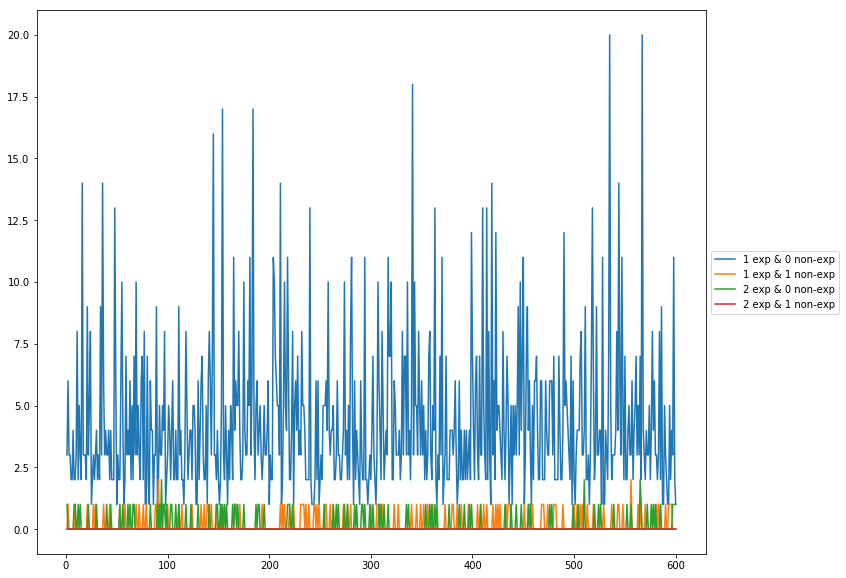

In [12]:
waitingtime_vs_employee('experienced cashier','new cashier','order waiting time') 

## Further Analysis

- With customer satisfactory being considered (waiting time), the owner of the shop also concerns about profit. Below is data exploration of profit at first glance. 

In [13]:
def profit_vs_employee(df,column1_name:str,column2_name:str,column3_name:str):
    plt.figure(figsize=(15,10))
    ax = plt.subplot(111)

    for i in range(min(df[column1_name]),max(df[column1_name])+1):
        for j in range(min(df[column2_name]),max(df[column2_name])+1):
            label=str(i)+" exp & "+str(j)+" non-exp"
            tmp_df=df.loc[(df[column1_name]==i) & (df[column2_name]==j)][column3_name]
            ax.plot(np.arange(1,len(tmp_df)+1),tmp_df,label=label)

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()

### Examine the relationship between combination of chef and profit

- As we can see from the plot below, with the same number of experienced chef, the more inexperienced chef the less the profit. Inexperienced chef lags the overall profit. 

- The more experienced chef doesn't necessary leads to more profit. As we can tell from the plot, the combination of 2 experienced chef and 1 inexperienced chef generates the lowest profit on average. 

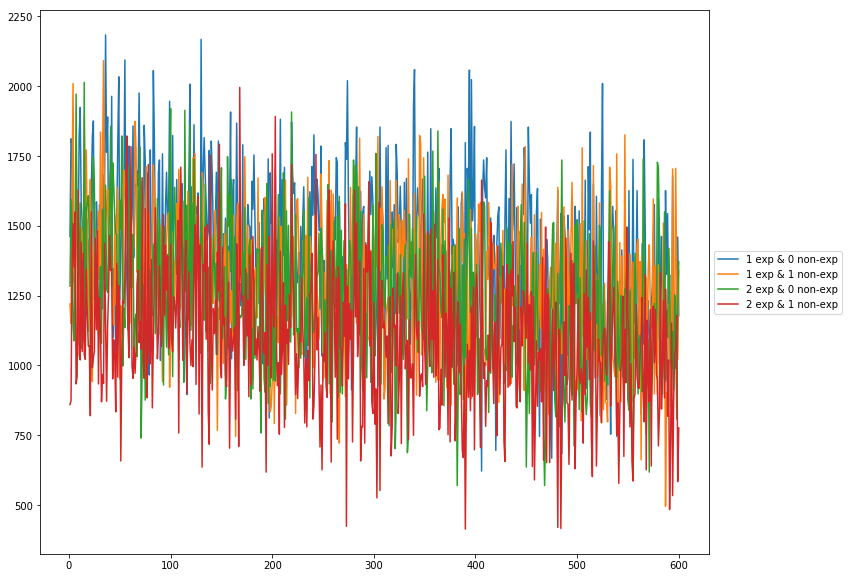

In [14]:
profit_vs_employee(df,'experienced chef','new chef','profit')

### Examine the relationship between combination of cashier and profit

- This plot shows similar result as the relationship between combination of chef and profit but the difference among different combination is slightly smaller.

- With the same number of experienced cashier, more inexperienced chef leads to slightly less profit. 

- The more experienced cashier doesn't necessary leads to more profit. As we can tell from the plot, the combination of 2 experienced cashier and 1 inexperienced cashier generates the lowest profit on average. 

- Overall the combination of cashier doesn't have significant impact on profit. 

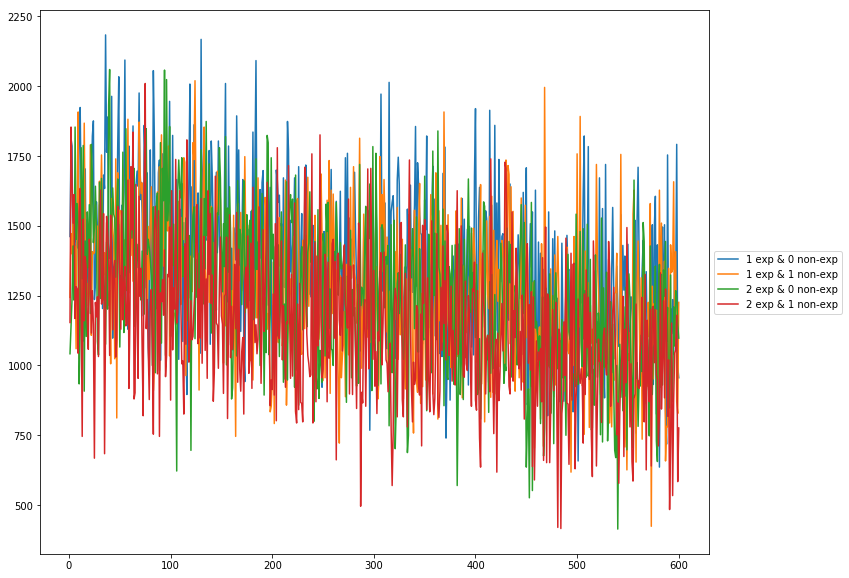

In [15]:
profit_vs_employee(df,'experienced cashier','new cashier','profit')